## Choose model

In [313]:
model_name = 'distilbert-base-cased'

## Load dataset

In [315]:
from datasets import load_dataset, DatasetDict

In [316]:
dataset = load_dataset("jonathanli/law-stack-exchange")

In [317]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'LastActivityDate', 'AnswerCount', 'CommentCount', 'ContentLicense', 'body', 'text_label', 'title'],
        num_rows: 638
    })
    validation: Dataset({
        features: ['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'LastActivityDate', 'AnswerCount', 'CommentCount', 'ContentLicense', 'body', 'text_label', 'title'],
        num_rows: 319
    })
    test: Dataset({
        features: ['Id', 'PostTypeId', 'CreationDate', 'Score', 'ViewCount', 'LastActivityDate', 'AnswerCount', 'CommentCount', 'ContentLicense', 'body', 'text_label', 'title'],
        num_rows: 1596
    })
})

In [318]:
dataset['train'][0]

{'Id': 71340,
 'PostTypeId': 1,
 'CreationDate': '2021-09-01T02:39:58.830',
 'Score': 0,
 'ViewCount': 128.0,
 'LastActivityDate': '2021-09-01T06:43:55.503',
 'AnswerCount': 1.0,
 'CommentCount': 9,
 'ContentLicense': 'CC BY-SA 4.0',
 'body': "I'm trying to comfortably use my laptop at night and now could not find an answer by web-search to the following: Why TVs / laptops etc. do not warn about too bright screen whereas many smartphones warn about too loud sound amplification? I'm asking on law site cause I suspect there were a number of successful lawsuits for impaired hearing from headphones but none for impaired vision from TVs. Am I right here? Digging down - has it happened because there are studies proving impairment for one and none for the other?\n\n\nAdded: I actually doubt my second guess cause there are a lot of enhancements in screen brightness - auto-brightness, night mode.\n\n\n",
 'text_label': 'civil-law',
 'title': 'Why TVs / laptops etc. do not warn about too brirght

## Prepare data

In [320]:
dataset = dataset.remove_columns(["Id", "PostTypeId", "CreationDate", "Score", "ViewCount", "LastActivityDate",
                                 "AnswerCount", "CommentCount", "ContentLicense", "title"])

In [321]:
dataset = dataset.rename_column("text_label", "label")
dataset = dataset.rename_column("body", "text")

In [322]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 638
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 319
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1596
    })
})

In [323]:
import pandas as pd

<Axes: ylabel='0'>

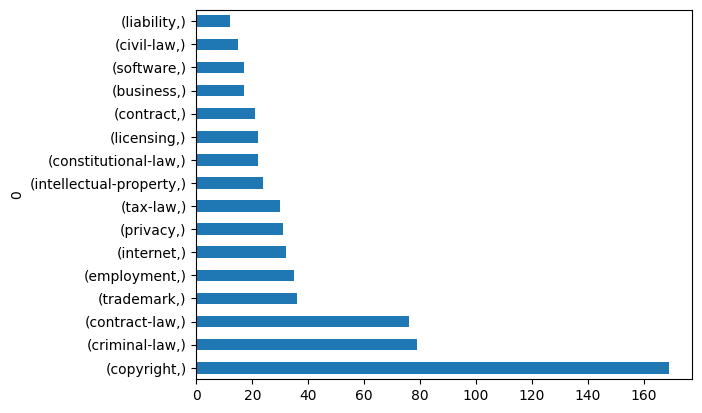

In [324]:
train_labels = pd.DataFrame(dataset['train']['label']).value_counts()
train_labels.plot(kind='barh')

<Axes: ylabel='0'>

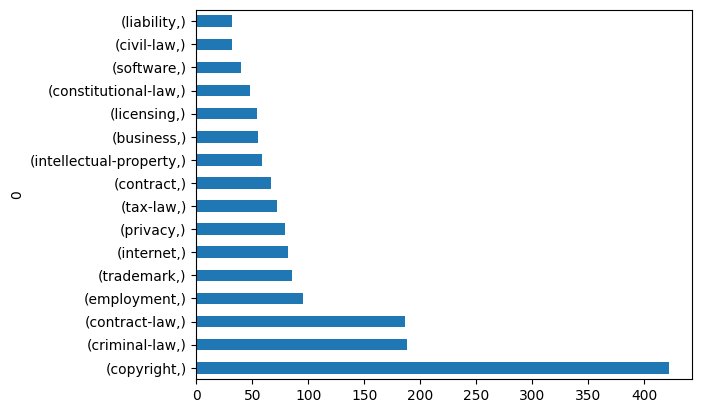

In [325]:
test_labels = pd.DataFrame(dataset['test']['label']).value_counts()
test_labels.plot(kind='barh')

In [326]:
NUM_LABELS = len(train_labels)
print(NUM_LABELS)

16


In [327]:
# need to properly encode the labels 
from datasets import Dataset, Value, ClassLabel, Features

In [328]:
dataset['train'].features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='string', id=None)}

In [329]:
features = Features({"text": Value("string"), "label": ClassLabel(num_classes=NUM_LABELS, names=train_labels.index.to_list())})

In [330]:
def encode_labels(dataset):
    encoded_data = pd.DataFrame(dataset)
    encoded_data = Dataset.from_pandas(encoded_data)
    encoded_data = encoded_data.class_encode_column("label")
    return encoded_data

In [331]:
train_data = encode_labels(dataset['train'])
test_data = encode_labels(dataset['test'])

Casting to class labels:   0%|          | 0/638 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/1596 [00:00<?, ? examples/s]

In [332]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['business', 'civil-law', 'constitutional-law', 'contract', 'contract-law', 'copyright', 'criminal-law', 'employment', 'intellectual-property', 'internet', 'liability', 'licensing', 'privacy', 'software', 'tax-law', 'trademark'], id=None)}

In [333]:
# create id2label and label2id
labels = train_data.features['label'].names
ids = range(NUM_LABELS)
id2label = dict(zip(ids, labels))   
label2id = dict(zip(labels, ids)) 

In [334]:
# balance the dataset
from datasets import concatenate_datasets

label_0_train_data = train_data.filter(lambda example: example["label"] == 0).select(range(10))
label_1_train_data = train_data.filter(lambda example: example["label"] == 1).select(range(10))
label_2_train_data = train_data.filter(lambda example: example["label"] == 2).select(range(10))
label_3_train_data = train_data.filter(lambda example: example["label"] == 3).select(range(10))
label_4_train_data = train_data.filter(lambda example: example["label"] == 4).select(range(10))
label_5_train_data = train_data.filter(lambda example: example["label"] == 5).select(range(10))
label_6_train_data = train_data.filter(lambda example: example["label"] == 6).select(range(10))
label_7_train_data = train_data.filter(lambda example: example["label"] == 7).select(range(10))
label_8_train_data = train_data.filter(lambda example: example["label"] == 8).select(range(10))
label_9_train_data = train_data.filter(lambda example: example["label"] == 9).select(range(10))
label_10_train_data = train_data.filter(lambda example: example["label"] == 10).select(range(10))
label_11_train_data = train_data.filter(lambda example: example["label"] == 11).select(range(10))
label_12_train_data = train_data.filter(lambda example: example["label"] == 12).select(range(10))
label_13_train_data = train_data.filter(lambda example: example["label"] == 13).select(range(10))
label_14_train_data = train_data.filter(lambda example: example["label"] == 14).select(range(10))
label_15_train_data = train_data.filter(lambda example: example["label"] == 15).select(range(10))

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

Filter:   0%|          | 0/638 [00:00<?, ? examples/s]

In [335]:
train_data = concatenate_datasets([label_0_train_data, label_1_train_data, label_2_train_data,
                                   label_3_train_data, label_4_train_data, label_5_train_data,
                                   label_6_train_data, label_7_train_data, label_8_train_data,
                                   label_9_train_data, label_10_train_data, label_11_train_data,
                                   label_12_train_data, label_13_train_data, label_14_train_data,
                                   label_15_train_data])
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 160
})

In [336]:
label_0_test_data = test_data.filter(lambda example: example["label"] == 0).select(range(5))
label_1_test_data = test_data.filter(lambda example: example["label"] == 1).select(range(5))
label_2_test_data = test_data.filter(lambda example: example["label"] == 2).select(range(5))
label_3_test_data = test_data.filter(lambda example: example["label"] == 3).select(range(5))
label_4_test_data = test_data.filter(lambda example: example["label"] == 4).select(range(5))
label_5_test_data = test_data.filter(lambda example: example["label"] == 5).select(range(5))
label_6_test_data = test_data.filter(lambda example: example["label"] == 6).select(range(5))
label_7_test_data = test_data.filter(lambda example: example["label"] == 7).select(range(5))
label_8_test_data = test_data.filter(lambda example: example["label"] == 8).select(range(5))
label_9_test_data = test_data.filter(lambda example: example["label"] == 9).select(range(5))
label_10_test_data = test_data.filter(lambda example: example["label"] == 10).select(range(5))
label_11_test_data = test_data.filter(lambda example: example["label"] == 11).select(range(5))
label_12_test_data = test_data.filter(lambda example: example["label"] == 12).select(range(5))
label_13_test_data = test_data.filter(lambda example: example["label"] == 13).select(range(5))
label_14_test_data = test_data.filter(lambda example: example["label"] == 14).select(range(5))
label_15_test_data = test_data.filter(lambda example: example["label"] == 15).select(range(5))

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1596 [00:00<?, ? examples/s]

In [337]:
test_data = concatenate_datasets([label_0_test_data, label_1_test_data, label_2_test_data,
                                   label_3_test_data, label_4_test_data, label_5_test_data,
                                   label_6_test_data, label_7_test_data, label_8_test_data,
                                   label_9_test_data, label_10_test_data, label_11_test_data,
                                   label_12_test_data, label_13_test_data, label_14_test_data,
                                   label_15_test_data])
test_data

Dataset({
    features: ['text', 'label'],
    num_rows: 80
})

In [361]:
# tokenize
from transformers import AutoTokenizer

In [363]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [365]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

In [367]:
tokenized_train = train_data.map(tokenize_function, batched=True)
tokenized_test = test_data.map(tokenize_function, batched=True)

Map:   0%|          | 0/160 [00:00<?, ? examples/s]

Map:   0%|          | 0/80 [00:00<?, ? examples/s]

In [369]:
tokenized_train = tokenized_train.remove_columns(["text"])
tokenized_test = tokenized_test.remove_columns(["text"])

In [371]:
tokenized_train

Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 160
})

## Train model

In [374]:
from transformers import AutoModelForSequenceClassification

In [376]:
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=NUM_LABELS, label2id=label2id, id2label=id2label)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [378]:
from transformers import TrainingArguments

In [380]:
training_args = TrainingArguments(output_dir="my_test_model", eval_strategy="epoch")

In [382]:
import numpy as np
import evaluate

In [384]:
metric = evaluate.load("accuracy")

In [385]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [386]:
from transformers import Trainer

In [388]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    compute_metrics=compute_metrics,
)

In [392]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,2.722277,0.187500
2,No log,2.542858,0.337500
3,No log,2.459806,0.425000


TrainOutput(global_step=60, training_loss=2.5994639078776043, metrics={'train_runtime': 653.6613, 'train_samples_per_second': 0.734, 'train_steps_per_second': 0.092, 'total_flos': 63600226467840.0, 'train_loss': 2.5994639078776043, 'epoch': 3.0})

## Evaluate model

In [394]:
trainer.evaluate()

{'eval_loss': 2.459805965423584,
 'eval_accuracy': 0.425,
 'eval_runtime': 29.3848,
 'eval_samples_per_second': 2.722,
 'eval_steps_per_second': 0.34,
 'epoch': 3.0}

## Hyperparameter tuning

In [85]:
import optuna

In [87]:
# initialise a new model for each tuning run
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=NUM_LABELS, id2label=id2label, label2id = label2id)

In [89]:
# function to control the search of hyperparams to tune
def hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-4, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        "num_train_epochs": trial.suggest_categorical("num_train_epochs", [2, 3, 5]),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1)
    }

In [91]:
# create the training args for each tuning run
tuning_training_args = TrainingArguments(
    output_dir="model_tuning_output",
    eval_strategy="epoch",
    learning_rate=2e-5,  # Placeholder; will be overridden by the hyperparameter search
    per_device_train_batch_size=16,  # Placeholder; will be overridden by the hyperparameter search
    num_train_epochs=3,  # Placeholder; will be overridden by the hyperparameter search
    weight_decay=0.1,
    logging_dir="./logs",
    #push_to_hub=True
)

In [93]:
tuning_trainer = Trainer(
    model_init=model_init,
    args=tuning_training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    processing_class=tokenizer,
    compute_metrics=compute_metrics,
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [95]:
best_trial = tuning_trainer.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=hp_space,
    n_trials=10
)

[I 2025-01-29 16:35:57,252] A new study created in memory with name: no-name-4c162998-9ba6-4eac-8649-2df5c8659211
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,2.582656,0.400000
2,No log,2.512038,0.400000
3,No log,2.445011,0.400000


[W 2025-01-29 16:42:54,520] Trial 0 failed with parameters: {'learning_rate': 1.4904764964403467e-05, 'per_device_train_batch_size': 16, 'num_train_epochs': 5, 'weight_decay': 0.021925073901551698} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\lnewb\anaconda3\envs\huggingface_course_env\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\lnewb\anaconda3\envs\huggingface_course_env\Lib\site-packages\transformers\integrations\integration_utils.py", line 249, in _objective
    trainer.train(resume_from_checkpoint=checkpoint, trial=trial)
  File "C:\Users\lnewb\anaconda3\envs\huggingface_course_env\Lib\site-packages\transformers\trainer.py", line 2164, in train
    return inner_training_loop(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lnewb\anaconda3\envs\huggingface_course_env\Lib\site-packages\transformers\trainer.py", lin

KeyboardInterrupt: 

In [52]:
print("Best Hyperparameters:", best_trial.hyperparameters)

Best Hyperparameters: {'learning_rate': 0.0003461152202579902, 'per_device_train_batch_size': 8, 'num_train_epochs': 2, 'weight_decay': 0.014902312802435893}


In [53]:
tuning_trainer.model.save_pretrained("my_tuned_model") # not used when pushing model to hub
tuning_trainer.processing_class.save_pretrained("tokenizer")

('tokenizer\\tokenizer_config.json',
 'tokenizer\\special_tokens_map.json',
 'tokenizer\\vocab.txt',
 'tokenizer\\added_tokens.json',
 'tokenizer\\tokenizer.json')

In [54]:
#tuning_trainer.push_to_hub("my_tuned_model") # to be used when push_to_hub = True

CommitInfo(commit_url='https://huggingface.co/lnewbould/my_tuned_model/commit/be1419f3a6cd678c81533826e6a1f5060f759c7a', commit_message='End of training', commit_description='', oid='be1419f3a6cd678c81533826e6a1f5060f759c7a', pr_url=None, repo_url=RepoUrl('https://huggingface.co/lnewbould/my_tuned_model', endpoint='https://huggingface.co', repo_type='model', repo_id='lnewbould/my_tuned_model'), pr_revision=None, pr_num=None)

## Inference

In [57]:
my_model = AutoModelForSequenceClassification.from_pretrained("my_tuned_model")
#my_model = AutoModelForSequenceClassification.from_pretrained("lnewbould/my_tuned_model") # to be used when push_to_hub = True
my_tokenizer = AutoTokenizer.from_pretrained("tokenizer")

config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

C:\Users\lnewb\anaconda3\envs\huggingface_course_env\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lnewb\.cache\huggingface\hub\models--lnewbould--my_tuned_model. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [56]:
from transformers import pipeline

In [58]:
my_text_classifier = pipeline("text-classification", model=my_model, tokenizer=my_tokenizer)

Device set to use cpu


In [59]:
row_n = 4
val_text = dataset['validation']['text'][row_n]
val_label = dataset['validation']['label'][row_n]

In [60]:
my_model_result = my_text_classifier(val_text)

In [61]:
print("Text to classify:\n", val_text, 
      "\n\nThe correct label from the dataset:", val_label, 
      "\nOur model classification:", my_model_result[0]['label'], "with a score of", my_model_result[0]['score'])

Text to classify:
 A federal law against FGM was ruled unconstitutional today on the grounds that the powers under which the law was written were not applicable to the activity being criminalized.


Are there any other powers the US federal government has to criminalize FGM?


 

The correct label from the dataset: criminal-law 
Our model classification: copyright with a score of 0.11922887712717056


## Pushing model to hub

Will need to move this section up in finished file so hyperparam tuning can be uploaded to hub. 

In [63]:
#from huggingface_hub import notebook_login
#notebook_login()

In [64]:
#my_model.push_to_hub("my-test-model")

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

C:\Users\lnewb\anaconda3\envs\huggingface_course_env\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lnewb\.cache\huggingface\hub\models--lnewbould--my-test-model. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
# show we can also deploy model to endpoint

## Pytorch and Tensorflow